# Project: Wrangling and Analyze Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import requests
import os
import json

from PIL import Image
from io import BytesIO

In [2]:
# to display all the columns
pd.set_option('display.max_columns', None)


## Data Gathering
Gathering **all** three pieces of data for this project and load them in the notebook.


### 1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [3]:
# read twitter_archive
twitter_archive = pd.read_csv("twitter-archive-enhanced.csv")
twitter_archive.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

### 2. Using the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
image_pred = requests.get(url)

In [5]:
# get path to store the new dataset

path = r"C:\Users\Egharevba Blessing\Desktop\ALX\Data Wrangling - Course 2"

In [6]:
with open(path + '/' + "image_predictions.tsv", "wb") as f:
    f.write(image_pred.content)

In [7]:
image_pred = pd.read_csv("img_pred.txt", sep = "\t")

In [8]:
image_pred

tweet_id                                          jpg_url  \
0     666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
...                  ...                                              ...   
2070  891327558926688256  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
2071  891689557279858688  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
2072  891815181378084864  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2073  892177421306343426  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
2074  892420643555336193  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

      img_num                      p1   p1_conf  p1_dog                  p2  \
0           1  Welsh_springer_spaniel  0.465074    True              collie   
1           1                 redbone  0.506826    True  miniature_pinscher   
2           1         German_shepherd  0.596461    True            malinois   
3           1     Rhodesian_ridgeback  0.408143    True             redbone   
4           1      miniature_pinscher  0.560311    True          Rottweiler   
...       ...                     ...       ...     ...                 ...   
2070        2                  basset  0.555712    True    English_springer   
2071        1             paper_towel  0.170278   False  Labrador_retriever   
2072        1               Chihuahua  0.716012    True            malamute   
2073        1               Chihuahua  0.323581    True            Pekinese   
2074        1                  orange  0.097049   False               bagel   

       p2_conf  p2_dog                           p3   p3_conf  p3_dog  
0     0.156665    True            Shetland_sheepdog  0.061428    True  
1     0.074192    True          Rhodesian_ridgeback  0.072010    True  
2     0.138584    True                   bloodhound  0.116197    True  
3     0.360687    True           miniature_pinscher  0.222752    True  
4     0.243682    True                     Doberman  0.154629    True  
...        ...     ...                          ...       ...     ...  
2070  0.225770    True  German_short-haired_pointer  0.175219    True  
2071  0.168086    True                      spatula  0.040836   False  
2072  0.078253    True                       kelpie  0.031379    True  
2073  0.090647    True                     papillon  0.068957    True  
2074  0.085851   False                       banana  0.076110   False  

[2075 rows x 12 columns]

### 3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [9]:
import tweepy
from tweepy import OAuthHandler
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
# consumer_key = 'HIDDEN'
# consumer_secret = 'HIDDEN'
# access_token = 'HIDDEN'
# access_secret = 'HIDDEN'

# auth = OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth, wait_on_rate_limit=True)

# # NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# # df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# # change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# # NOTE TO REVIEWER: this student had mobile verification issues so the following
# # Twitter API code was sent to this student from a Udacity instructor
# # Tweet IDs for which to gather additional data via Twitter's API
# tweet_ids = twitter_archive.tweet_id.values
# len(tweet_ids)

# # Query Twitter's API for JSON data for each tweet ID in the Twitter archive
# count = 0
# fails_dict = {}
# start = timer()
# # Save each tweet's returned JSON as a new line in a .txt file
# with open('tweet_json.txt', 'w') as outfile:
#     # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#     for tweet_id in tweet_ids:
#         count += 1
#         print(str(count) + ": " + str(tweet_id))
#         try:
#             tweet = api.get_status(tweet_id, tweet_mode='extended')
#             print("Success")
#             json.dump(tweet._json, outfile)
#             outfile.write('\n')
#         except tweepy.errors.HTTPException as e:
#             print("Fail")
#             fails_dict[tweet_id] = e
#             pass
# end = timer()
# print(end - start)
# print(fails_dict)

In [10]:
# get the path of the tweet_json file from local directory

path2 = r"C:\Users\Egharevba Blessing\Desktop\ALX\Data Wrangling - Course 2\tweet_json.txt"

In [11]:
# load the json file to a dataframe

data = []
with open(path2) as f:
    for line in f:
        tweet = json.loads(line)
        
        tweet_id = tweet["id"]
        created_at = tweet["created_at"]
        retweet_count = tweet["retweet_count"]
        favourite_count = tweet["favorite_count"]
        retweeted = tweet["retweeted"]
        lang = tweet["lang"]

        data.append({"tweet_id":tweet_id,
                    "retweet_count":int(retweet_count),
                    "favorite_count": int(favourite_count),
                    "retweeted": retweeted,
                    "lang": lang})
    
tweet_df = pd.DataFrame(data, columns = ['tweet_id', 'retweet_count', 'favorite_count', 'retweeted', 'lang'])

In [12]:
tweet_df

tweet_id  retweet_count  favorite_count  retweeted lang
0     892420643555336193           8853           39467      False   en
1     892177421306343426           6514           33819      False   en
2     891815181378084864           4328           25461      False   en
3     891689557279858688           8964           42908      False   en
4     891327558926688256           9774           41048      False   en
...                  ...            ...             ...        ...  ...
2349  666049248165822465             41             111      False   en
2350  666044226329800704            147             311      False   en
2351  666033412701032449             47             128      False   en
2352  666029285002620928             48             132      False   en
2353  666020888022790149            532            2535      False   en

[2354 rows x 5 columns]

# Final Datasets
> - ### twitter_archive
> - ### image_pred
> - ### tweet_df

## Assessing Data
Detecting and documenting **eight (8) quality issues and two (2) tidiness issue**, using **both** visual assessment
programmatic assessement to assess the data.

### Accessing twitter_archive

In [13]:
twitter_archive.sample()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
876  761004547850530816                    NaN                  NaN   

                     timestamp  \
876  2016-08-04 01:03:17 +0000   

                                                source  \
876  <a href="http://twitter.com/download/iphone" r...   

                                                  text  retweeted_status_id  \
876  This is Bo and Ty. Bo eats paper and Ty felt l...                  NaN   

     retweeted_status_user_id retweeted_status_timestamp  \
876                       NaN                        NaN   

                                         expanded_urls  rating_numerator  \
876  https://twitter.com/dog_rates/status/761004547...                11   

     rating_denominator name doggo floofer pupper puppo  
876                  10   Bo  None    None   None  None

In [14]:
twitter_archive.rating_numerator.max()

1776

In [15]:
twitter_archive.rating_denominator.max()

170

In [16]:
# to get information about the dataset, for enormous datatypes and number of non-null values

twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [17]:
# To check for retweets in the dataframe

twitter_archive[twitter_archive["retweeted_status_id"].notnull()]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
19    888202515573088257                    NaN                  NaN   
32    886054160059072513                    NaN                  NaN   
36    885311592912609280                    NaN                  NaN   
68    879130579576475649                    NaN                  NaN   
73    878404777348136964                    NaN                  NaN   
...                  ...                    ...                  ...   
1023  746521445350707200                    NaN                  NaN   
1043  743835915802583040                    NaN                  NaN   
1242  711998809858043904                    NaN                  NaN   
2259  667550904950915073                    NaN                  NaN   
2260  667550882905632768                    NaN                  NaN   

                      timestamp  \
19    2017-07-21 01:02:36 +0000   
32    2017-07-15 02:45:48 +0000   
36    2017-07-13 01:35:06 +0000   
68    2017-06-26 00:13:58 +0000   
73    2017-06-24 00:09:53 +0000   
...                         ...   
1023  2016-06-25 01:52:36 +0000   
1043  2016-06-17 16:01:16 +0000   
1242  2016-03-21 19:31:59 +0000   
2259  2015-11-20 03:51:52 +0000   
2260  2015-11-20 03:51:47 +0000   

                                                 source  \
19    <a href="http://twitter.com/download/iphone" r...   
32    <a href="http://twitter.com/download/iphone" r...   
36    <a href="http://twitter.com/download/iphone" r...   
68    <a href="http://twitter.com/download/iphone" r...   
73    <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
1023  <a href="http://twitter.com/download/iphone" r...   
1043  <a href="http://twitter.com/download/iphone" r...   
1242  <a href="http://twitter.com/download/iphone" r...   
2259  <a href="http://twitter.com" rel="nofollow">Tw...   
2260  <a href="http://twitter.com" rel="nofollow">Tw...   

                                                   text  retweeted_status_id  \
19    RT @dog_rates: This is Canela. She attempted s...         8.874740e+17   
32    RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...         8.860537e+17   
36    RT @dog_rates: This is Lilly. She just paralle...         8.305833e+17   
68    RT @dog_rates: This is Emmy. She was adopted t...         8.780576e+17   
73    RT @dog_rates: Meet Shadow. In an attempt to r...         8.782815e+17   
...                                                 ...                  ...   
1023  RT @dog_rates: This is Shaggy. He knows exactl...         6.678667e+17   
1043  RT @dog_rates: Extremely intelligent dog here....         6.671383e+17   
1242  RT @twitter: @dog_rates Awesome Tweet! 12/10. ...         7.119983e+17   
2259  RT @dogratingrating: Exceptional talent. Origi...         6.675487e+17   
2260  RT @dogratingrating: Unoriginal idea. Blatant ...         6.675484e+17   

      retweeted_status_user_id retweeted_status_timestamp  \
19                4.196984e+09  2017-07-19 00:47:34 +0000   
32                1.960740e+07  2017-07-15 02:44:07 +0000   
36                4.196984e+09  2017-02-12 01:04:29 +0000   
68                4.196984e+09  2017-06-23 01:10:23 +0000   
73                4.196984e+09  2017-06-23 16:00:04 +0000   
...                        ...                        ...   
1023              4.196984e+09  2015-11-21 00:46:50 +0000   
1043              4.196984e+09  2015-11-19 00:32:12 +0000   
1242              7.832140e+05  2016-03-21 19:29:52 +0000   
2259              4.296832e+09  2015-11-20 03:43:06 +0000   
2260              4.296832e+09  2015-11-20 03:41:59 +0000   

                                          expanded_urls  rating_numerator  \
19    https://twitter.com/dog_rates/status/887473957...                13   
32    https://twitter.com/dog_rates/status/886053434...                12   
36    https://twitter.com/dog_rates/status/830583320...                13   
68    https://twitt

In [18]:
# to check columns with missing values greater than 50%

twitter_archive.isnull().sum()/len(twitter_archive) *100


tweet_id                       0.000000
in_reply_to_status_id         96.689304
in_reply_to_user_id           96.689304
timestamp                      0.000000
source                         0.000000
text                           0.000000
retweeted_status_id           92.317487
retweeted_status_user_id      92.317487
retweeted_status_timestamp    92.317487
expanded_urls                  2.504244
rating_numerator               0.000000
rating_denominator             0.000000
name                           0.000000
doggo                          0.000000
floofer                        0.000000
pupper                         0.000000
puppo                          0.000000
dtype: float64

In [19]:
# check for duplicates
twitter_archive.tweet_id.duplicated().sum()

0

In [20]:
# to access the dog_names
twitter_archive.name.value_counts()

None         745
a             55
Charlie       12
Lucy          11
Oliver        11
            ... 
Kial           1
Hall           1
Tanner         1
Scruffers      1
Sprout         1
Name: name, Length: 957, dtype: int64

In [21]:
# get possible invalid names
len_2 = []
for i in twitter_archive.name:
    if len(i)<=2:
        len_2.append(i)
    
set(len_2)

{'Al', 'Bo', 'Ed', 'JD', 'Jo', 'Mo', 'O', 'a', 'an', 'by', 'my'}

In [22]:
# another way to check for invalid dog names
mask = twitter_archive.name.str.islower() 

In [23]:
twitter_archive[mask].head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
22   887517139158093824                    NaN                  NaN   
56   881536004380872706                    NaN                  NaN   
118  869988702071779329                    NaN                  NaN   
169  859196978902773760                    NaN                  NaN   
193  855459453768019968                    NaN                  NaN   

                     timestamp  \
22   2017-07-19 03:39:09 +0000   
56   2017-07-02 15:32:16 +0000   
118  2017-05-31 18:47:24 +0000   
169  2017-05-02 00:04:57 +0000   
193  2017-04-21 16:33:22 +0000   

                                                source  \
22   <a href="http://twitter.com/download/iphone" r...   
56   <a href="http://twitter.com/download/iphone" r...   
118  <a href="http://twitter.com/download/iphone" r...   
169  <a href="http://twitter.com/download/iphone" r...   
193  <a href="http://twitter.com/download/iphone" r...   

                                                  text  retweeted_status_id  \
22   I've yet to rate a Venezuelan Hover Wiener. Th...                  NaN   
56   Here is a pupper approaching maximum borkdrive...                  NaN   
118  RT @dog_rates: We only rate dogs. This is quit...         8.591970e+17   
169  We only rate dogs. This is quite clearly a smo...                  NaN   
193  Guys, we only rate dogs. This is quite clearly...                  NaN   

     retweeted_status_user_id retweeted_status_timestamp  \
22                        NaN                        NaN   
56                        NaN                        NaN   
118              4.196984e+09  2017-05-02 00:04:57 +0000   
169                       NaN                        NaN   
193                       NaN                        NaN   

                                         expanded_urls  rating_numerator  \
22   https://twitter.com/dog_rates/status/887517139...                14   
56   https://twitter.com/dog_rates/status/881536004...                14   
118  https://twitter.com/dog_rates/status/859196978...                12   
169  https://twitter.com/dog_rates/status/859196978...                12   
193  https://twitter.com/dog_rates/status/855459453...                12   

     rating_denominator   name doggo floofer  pupper puppo  
22                   10   such  None    None    None  None  
56                   10      a  None    None  pupper  None  
118                  10  quite  None    None    None  None  
169                  10  quite  None    None    None  None  
193                  10  quite  None    None    None  None

In [24]:
twitter_archive[(twitter_archive.name == "Al") | (twitter_archive.name == "O") |
                     (twitter_archive.name == "my") | (twitter_archive.name == "a")
                     | (twitter_archive.name == "an") | (twitter_archive.name == "my")]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
56    881536004380872706                    NaN                  NaN   
649   792913359805018113                    NaN                  NaN   
759   778396591732486144                    NaN                  NaN   
775   776201521193218049                    NaN                  NaN   
801   772581559778025472                    NaN                  NaN   
...                  ...                    ...                  ...   
2349  666051853826850816                    NaN                  NaN   
2350  666050758794694657                    NaN                  NaN   
2352  666044226329800704                    NaN                  NaN   
2353  666033412701032449                    NaN                  NaN   
2354  666029285002620928                    NaN                  NaN   

                      timestamp  \
56    2017-07-02 15:32:16 +0000   
649   2016-10-31 02:17:31 +0000   
759   2016-09-21 00:53:04 +0000   
775   2016-09-14 23:30:38 +0000   
801   2016-09-04 23:46:12 +0000   
...                         ...   
2349  2015-11-16 00:35:11 +0000   
2350  2015-11-16 00:30:50 +0000   
2352  2015-11-16 00:04:52 +0000   
2353  2015-11-15 23:21:54 +0000   
2354  2015-11-15 23:05:30 +0000   

                                                 source  \
56    <a href="http://twitter.com/download/iphone" r...   
649   <a href="http://twitter.com/download/iphone" r...   
759   <a href="http://twitter.com/download/iphone" r...   
775   <a href="http://twitter.com/download/iphone" r...   
801   <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
2349  <a href="http://twitter.com/download/iphone" r...   
2350  <a href="http://twitter.com/download/iphone" r...   
2352  <a href="http://twitter.com/download/iphone" r...   
2353  <a href="http://twitter.com/download/iphone" r...   
2354  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
56    Here is a pupper approaching maximum borkdrive...                  NaN   
649   Here is a perfect example of someone who has t...                  NaN   
759   RT @dog_rates: This is an East African Chalupa...         7.030419e+17   
775   This is O'Malley. That is how he sleeps. Doesn...                  NaN   
801   Guys this is getting so out of hand. We only r...                  NaN   
...                                                 ...                  ...   
2349  This is an odd dog. Hard on the outside but lo...                  NaN   
2350  This is a truly beautiful English Wilson Staff...                  NaN   
2352  This is a purebred Piers Morgan. Loves to Netf...                  NaN   
2353  Here is a very happy pup. Big fan of well-main...                  NaN   
2354  This is a western brown Mitsubishi terrier. Up...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
56                         NaN                        NaN   
649                        NaN                        NaN   
759               4.196984e+09  2016-02-26 02:20:37 +0000   
775                        NaN                        NaN   
801                        NaN                        NaN   
...                        ...                        ...   
2349                       NaN                        NaN   
2350                       NaN                        NaN   
2352                       NaN                        NaN   
2353                       NaN                        NaN   
2354                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
56    https://twitter.com/dog_rates/status/881536004...                14   
649   https://twitter.com/dog_rates/status/792913359...                13   
759   https://twitter.com/dog_rates/status/703041949...                10   
775   https://twitt

In [25]:
# change Al to Al Cabone
# change O to O'Malley
# change my to Zoey
# change a, an, by, e.t.c to Null_values

In [26]:
# get a statistical summary of the appropriate columns
twitter_archive[["rating_numerator", "rating_denominator"]].describe()

rating_numerator  rating_denominator
count       2356.000000         2356.000000
mean          13.126486           10.455433
std           45.876648            6.745237
min            0.000000            0.000000
25%           10.000000           10.000000
50%           11.000000           10.000000
75%           12.000000           10.000000
max         1776.000000          170.000000

## Accessing Image_pred

In [27]:
image_pred.head(5)

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

In [28]:
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [29]:
image_pred[image_pred.tweet_id.duplicated()]

Empty DataFrame
Columns: [tweet_id, jpg_url, img_num, p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog]
Index: []

In [30]:
image_pred.query("p2 == 'bathtub'")

tweet_id                                            jpg_url  \
296   671362598324076544    https://pbs.twimg.com/media/CVEouDRXAAEe8mt.jpg   
376   673148804208660480    https://pbs.twimg.com/media/CVeBQwiUsAAqhLw.jpg   
623   680583894916304897    https://pbs.twimg.com/media/CXHrcFYWcAEE5_L.jpg   
1312  754482103782404096  https://pbs.twimg.com/ext_tw_video_thumb/75448...   
1533  789986466051088384    https://pbs.twimg.com/media/CvaYgDOWgAEfjls.jpg   
1538  790723298204217344    https://pbs.twimg.com/media/CvaYgDOWgAEfjls.jpg   

      img_num   p1   p1_conf  p1_dog       p2   p2_conf  p2_dog  \
296         1  tub  0.393616   False  bathtub  0.383522   False   
376         1  tub  0.873010   False  bathtub  0.091434   False   
623         1  tub  0.889801   False  bathtub  0.032351   False   
1312        1  tub  0.596796   False  bathtub  0.381098   False   
1533        1  tub  0.479477   False  bathtub  0.325106   False   
1538        1  tub  0.479477   False  bathtub  0.325106   False   

                    p3   p3_conf  p3_dog  
296    swimming_trunks  0.077301   False  
376        toilet_seat  0.025456   False  
623       hippopotamus  0.014177   False  
1312    shower_curtain  0.017629   False  
1533  golden_retriever  0.078530    True  
1538  golden_retriever  0.078530    True

In [31]:
image_pred.p1_conf.max()

1.0

In [32]:
image_pred.p2_conf.max()

0.4880140000000001

In [33]:
image_pred.query("p2_conf == 0.4880140000000001")

tweet_id                                          jpg_url  \
986  707693576495472641  https://pbs.twimg.com/media/CdI7jDnW0AA2dtO.jpg   

     img_num       p1   p1_conf  p1_dog   p2   p2_conf  p2_dog         p3  \
986        1  bathtub  0.499525   False  tub  0.488014   False  washbasin   

      p3_conf  p3_dog  
986  0.009298   False

### check for different variants of dog breeds (caps or not)

In [34]:
# check on p1

(len(image_pred.p1.str.lower().value_counts())) == (len(image_pred.p1.value_counts()))

True

In [35]:
# check on p2

(len(image_pred.p2.str.lower().value_counts())) == (len(image_pred.p2.value_counts()))

False

In [36]:
# check on p3

(len(image_pred.p3.str.lower().value_counts())) == (len(image_pred.p3.value_counts()))

True

In [37]:
# check entries with no true dogbreed prediction for all predictions

image_non_true = image_pred.query("p1_dog == False and p2_dog == False and p3_dog == False")
image_non_true.head()

tweet_id                                          jpg_url  \
6   666051853826850816  https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg   
17  666104133288665088  https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg   
18  666268910803644416  https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg   
21  666293911632134144  https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg   
25  666362758909284353  https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg   

    img_num                p1   p1_conf  p1_dog          p2   p2_conf  p2_dog  \
6         1        box_turtle  0.933012   False  mud_turtle  0.045885   False   
17        1               hen  0.965932   False        cock  0.033919   False   
18        1  desktop_computer  0.086502   False        desk  0.085547   False   
21        1  three-toed_sloth  0.914671   False       otter  0.015250   False   
25        1        guinea_pig  0.996496   False       skunk  0.002402   False   

                p3   p3_conf  p3_dog  
6         terrapin  0.017885   False  
17       partridge  0.000052   False  
18        bookcase  0.079480   False  
21  great_grey_owl  0.013207   False  
25         hamster  0.000461   False

In [38]:
len(image_non_true)

324

## Accessing Tweet_df

In [39]:
tweet_df.head(1)

tweet_id  retweet_count  favorite_count  retweeted lang
0  892420643555336193           8853           39467      False   en

In [40]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   int64 
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
 3   retweeted       2354 non-null   bool  
 4   lang            2354 non-null   object
dtypes: bool(1), int64(3), object(1)
memory usage: 76.0+ KB


In [41]:
tweet_df[tweet_df.tweet_id.duplicated()]

Empty DataFrame
Columns: [tweet_id, retweet_count, favorite_count, retweeted, lang]
Index: []

In [42]:
tweet_df.retweeted.value_counts()

False    2354
Name: retweeted, dtype: int64

In [43]:
tweet_df.lang.value_counts()

en     2336
und       7
in        3
nl        3
eu        1
et        1
tl        1
ro        1
es        1
Name: lang, dtype: int64

In [44]:
tweet_df["favorite_count"].min()

0

In [45]:
tweet_df.query("tweet_id == 749981277374128128")

tweet_id  retweet_count  favorite_count  retweeted lang
977  749981277374128128           2772            5569      False   en

In [46]:
# get a brief statistical description of the appropriate columns
tweet_df[["retweet_count", "favorite_count"]].describe()

retweet_count  favorite_count
count    2354.000000     2354.000000
mean     3164.797366     8080.968564
std      5284.770364    11814.771334
min         0.000000        0.000000
25%       624.500000     1415.000000
50%      1473.500000     3603.500000
75%      3652.000000    10122.250000
max     79515.000000   132810.000000

### Quality issues
> 1. Some of the tweet recorded in the tweet_archive are retweet.
2. Some Columns in twitter_archive contains missing values greater than 50% 
3. Some of the text has the dog stage in it, but absent in the appropriate columns i.e the text wasn't properly extracted
4. Enormous Datatypes(timestamp, tweet_id, retweet_count, favorite_count, retweeted and lang) in twitter_clean_df
5. Invalid Dog Names twitter_archive df: wrong extracted dog names
7. Different variants of dog breed (some starts with capital letter while some came out as lowercase) in P2 in image_pred
7. invalid prediction on Dog Breed in p1, p2 and p3 in Image_pred df like *bathtub, tub, bathing_cap, bathing_towel, beach_wagon .....*
8. No true dog_breed predictions (p1,p2,p3) for some tweet_id in image_pred.



### Tidiness issues
> 1. one column represented as 3 columns in twitter_archive df
> 2. one dataframe represented as 2 dataframes (twitter_archive and tweet_df)

## Cleaning Data
Cleaning **all** of the issues documented while assessing. 


In [47]:
# Make copies of original pieces of data

twitter_archive_clean = twitter_archive.copy()
image_pred_clean = image_pred.copy()
tweet_df_clean = tweet_df.copy()

### Issue #1: Some of the tweet recorded in the tweet_archive are retweet.

#### Define: 
> Drop retweet rows because what is needed is the original ratings (no retweets) that have images.

#### Code

In [48]:
# get only entries that are not retweets

twitter_archive_clean = twitter_archive_clean[twitter_archive_clean["retweeted_status_id"].isnull()]

#### Test

In [49]:
twitter_archive_clean[twitter_archive_clean["retweeted_status_id"].notnull()]

Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []

In [50]:
twitter_archive_clean.shape

(2175, 17)

### Issue #2: Some Columns in twitter_archive contains missing values greater than 50% 

#### Define: 
> Drop columns with missing values greater than 50% of the total entries

#### Code

In [51]:
# get the list of columns with missing values greater than 50%

col_to_drop = twitter_archive_clean.isnull().sum()[twitter_archive_clean.isnull().sum()/len(twitter_archive_clean) *100 > 50]
col_to_drop = list(col_to_drop.index)
col_to_drop

['in_reply_to_status_id',
 'in_reply_to_user_id',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp']

In [52]:
# drop the necessary columns

twitter_archive_clean.drop(col_to_drop, 1, inplace = True)

#### Test

In [53]:
twitter_archive_clean.isnull().sum()/len(twitter_archive_clean) *100 >50

tweet_id              False
timestamp             False
source                False
text                  False
expanded_urls         False
rating_numerator      False
rating_denominator    False
name                  False
doggo                 False
floofer               False
pupper                False
puppo                 False
dtype: bool

### Issue #3: Some of the text has the dog stage in it, but absent in the appropriate columns i.e the text wasn't properly extracted

#### Define:
> Extract as much as possible

#### Code

In [54]:
twitter_archive_clean.head(1)

tweet_id                  timestamp  \
0  892420643555336193  2017-08-01 16:23:56 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   

   rating_denominator     name doggo floofer pupper puppo  
0                  10  Phineas  None    None   None  None

In [55]:
# code to as many dog_stage values from the text column

text_to_etr = ["doggo", "floofer", "pupper", "puppo"]

for txt in twitter_archive_clean.text:
    txt_index = twitter_archive_clean[twitter_archive_clean.text == txt].index
    
    for t in text_to_etr:
        if t.lower() in txt.lower():
            if t == "doggo":
                twitter_archive_clean.doggo[txt_index] = t
            elif t == "floffer":
                twitter_archive_clean.floofer[txt_index] = t
            elif t == "pupper":
                twitter_archive_clean.pupper[txt_index] = t
                
            elif t == "puppo":
                twitter_archive_clean.puppo[txt_index] = t
                

C:\Users\Egharevba Blessing\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Egharevba Blessing\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\Egharevba Blessing\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

#### Test

In [56]:
twitter_archive_clean.pupper.value_counts()

None      1915
pupper     260
Name: pupper, dtype: int64

In [57]:
twitter_archive.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [58]:
# check the original twitter_archive df that wasnt properly extracted
twitter_archive.query("rating_numerator == 88")[["tweet_id", "text", "rating_numerator", "pupper"]]

tweet_id                                               text  \
1843  675853064436391936  Here we have an entire platoon of puppers. Tot...   

      rating_numerator pupper  
1843                88   None

In [59]:
# compare with the clean one to see if there has been effect
twitter_archive_clean.query("rating_numerator == 88")[["tweet_id", "text", "rating_numerator", "pupper"]]

tweet_id                                               text  \
1843  675853064436391936  Here we have an entire platoon of puppers. Tot...   

      rating_numerator  pupper  
1843                88  pupper

### Issue #4: one column represented as 3 columns in twitter_archive df

#### Define: 
> combine the 3 columns into one my using *melt* function

#### Code

In [60]:
twitter_archive_clean.head(2)

tweet_id                  timestamp  \
0  892420643555336193  2017-08-01 16:23:56 +0000   
1  892177421306343426  2017-08-01 00:17:27 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   

   rating_denominator     name doggo floofer pupper puppo  
0                  10  Phineas  None    None   None  None  
1                  10    Tilly  None    None   None  None

In [61]:
# define columns rows that won't require melting

twitter_archive_clean_unmelt = twitter_archive_clean.query("doggo == 'None' and floofer == 'None' and pupper == 'None' and puppo == 'None'")

In [62]:
twitter_archive_clean_unmelt.head(3)

tweet_id                  timestamp  \
0  892420643555336193  2017-08-01 16:23:56 +0000   
1  892177421306343426  2017-08-01 00:17:27 +0000   
2  891815181378084864  2017-07-31 00:18:03 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   

   rating_denominator     name doggo floofer pupper puppo  
0                  10  Phineas  None    None   None  None  
1                  10    Tilly  None    None   None  None  
2                  10   Archie  None    None   None  None

In [63]:
twitter_archive_clean_unmelt.shape

(1790, 12)

In [64]:
# define rows that will require melting

twitter_archive_clean_melt = twitter_archive_clean.query("doggo != 'None' or floofer != 'None' or pupper != 'None' or puppo != 'None'")

In [65]:
twitter_archive_clean_melt.head(3)

tweet_id                  timestamp  \
9   890240255349198849  2017-07-26 15:59:51 +0000   
12  889665388333682689  2017-07-25 01:55:32 +0000   
14  889531135344209921  2017-07-24 17:02:04 +0000   

                                               source  \
9   <a href="http://twitter.com/download/iphone" r...   
12  <a href="http://twitter.com/download/iphone" r...   
14  <a href="http://twitter.com/download/iphone" r...   

                                                 text  \
9   This is Cassie. She is a college pup. Studying...   
12  Here's a puppo that seems to be on the fence a...   
14  This is Stuart. He's sporting his favorite fan...   

                                        expanded_urls  rating_numerator  \
9   https://twitter.com/dog_rates/status/890240255...                14   
12  https://twitter.com/dog_rates/status/889665388...                13   
14  https://twitter.com/dog_rates/status/889531135...                13   

    rating_denominator    name  doggo floofer pupper  puppo  
9                   10  Cassie  doggo    None   None   None  
12                  10    None   None    None   None  puppo  
14                  10  Stuart   None    None   None  puppo

In [66]:
twitter_archive_clean_melt.shape

(385, 12)

In [67]:
twitter_archive_clean_melt_df = pd.melt(twitter_archive_clean_melt,id_vars=["tweet_id", "timestamp", "source",
                                                           "text", "expanded_urls", "rating_numerator",
                                                             "rating_denominator", "name" ], 
                                value_vars=["doggo", "floofer", "pupper", "puppo"],var_name="dog_stage",)
#                                  var_name="treament", value_name="dose")
     
# remove the rows with "None" value in the dog_stage
twitter_archive_clean_melt_df = twitter_archive_clean_melt_df[twitter_archive_clean_melt_df.value != "None"]

In [68]:
twitter_archive_clean_melt_df.head()

tweet_id                  timestamp  \
0   890240255349198849  2017-07-26 15:59:51 +0000   
4   884162670584377345  2017-07-09 21:29:42 +0000   
11  876537666061221889  2017-06-18 20:30:39 +0000   
16  872967104147763200  2017-06-09 00:02:31 +0000   
19  871515927908634625  2017-06-04 23:56:03 +0000   

                                               source  \
0   <a href="http://twitter.com/download/iphone" r...   
4   <a href="http://twitter.com/download/iphone" r...   
11  <a href="http://twitter.com/download/iphone" r...   
16  <a href="http://twitter.com/download/iphone" r...   
19  <a href="http://twitter.com/download/iphone" r...   

                                                 text  \
0   This is Cassie. She is a college pup. Studying...   
4   Meet Yogi. He doesn't have any important dog m...   
11  I can say with the pupmost confidence that the...   
16  Here's a very large dog. He has a date later. ...   
19  This is Napolean. He's a Raggedy East Nicaragu...   

                                        expanded_urls  rating_numerator  \
0   https://twitter.com/dog_rates/status/890240255...                14   
4   https://twitter.com/dog_rates/status/884162670...                12   
11  https://twitter.com/mpstowerham/status/8761629...                14   
16  https://twitter.com/dog_rates/status/872967104...                12   
19  https://twitter.com/dog_rates/status/871515927...                12   

    rating_denominator      name dog_stage  value  
0                   10    Cassie     doggo  doggo  
4                   10      Yogi     doggo  doggo  
11                  10      None     doggo  doggo  
16                  10      None     doggo  doggo  
19                  10  Napolean     doggo  doggo

In [69]:
twitter_archive_clean_melt_df.shape

(398, 10)

In [70]:
# twitter_archive_clean_melt_df.query("tweet_id == 858843525470990336")

In [71]:
# get all the duplicated values for tweet_id, both the original and the duplicated
dup = twitter_archive_clean_melt_df[twitter_archive_clean_melt_df.tweet_id.duplicated(keep = False)]

# get the all the dog_stage vale that pertains to a particular tweet
dup_df = dup.groupby(['tweet_id','timestamp','source','text', 'expanded_urls','rating_numerator'
                        , 'rating_denominator','name']).agg(', '.join).reset_index()

# drop the dupliacte vales from the main df
twitter_archive_clean_melt_df = twitter_archive_clean_melt_df.drop(dup.index)



In [72]:
# append the cleaned dup_df to twitter_archive_clean_melt_df
twitter_archive_clean_melt = twitter_archive_clean_melt_df.append(dup_df)

In [73]:
twitter_archive_clean_melt = twitter_archive_clean_melt.drop("value", 1)

In [74]:
twitter_archive_clean_melt.head()

tweet_id                  timestamp  \
0   890240255349198849  2017-07-26 15:59:51 +0000   
4   884162670584377345  2017-07-09 21:29:42 +0000   
11  876537666061221889  2017-06-18 20:30:39 +0000   
16  872967104147763200  2017-06-09 00:02:31 +0000   
19  871515927908634625  2017-06-04 23:56:03 +0000   

                                               source  \
0   <a href="http://twitter.com/download/iphone" r...   
4   <a href="http://twitter.com/download/iphone" r...   
11  <a href="http://twitter.com/download/iphone" r...   
16  <a href="http://twitter.com/download/iphone" r...   
19  <a href="http://twitter.com/download/iphone" r...   

                                                 text  \
0   This is Cassie. She is a college pup. Studying...   
4   Meet Yogi. He doesn't have any important dog m...   
11  I can say with the pupmost confidence that the...   
16  Here's a very large dog. He has a date later. ...   
19  This is Napolean. He's a Raggedy East Nicaragu...   

                                        expanded_urls  rating_numerator  \
0   https://twitter.com/dog_rates/status/890240255...                14   
4   https://twitter.com/dog_rates/status/884162670...                12   
11  https://twitter.com/mpstowerham/status/8761629...                14   
16  https://twitter.com/dog_rates/status/872967104...                12   
19  https://twitter.com/dog_rates/status/871515927...                12   

    rating_denominator      name dog_stage  
0                   10    Cassie     doggo  
4                   10      Yogi     doggo  
11                  10      None     doggo  
16                  10      None     doggo  
19                  10  Napolean     doggo

In [75]:
# drop the dog_stage from the unmelt df, since all values are none, and have just one column to rep the dog_stage

twitter_archive_clean_unmelt = twitter_archive_clean_unmelt.rename(
    columns = {"doggo":"dog_stage"}).drop(["floofer","pupper", "puppo"], 1)

In [76]:
twitter_archive_clean_unmelt.head(1)

tweet_id                  timestamp  \
0  892420643555336193  2017-08-01 16:23:56 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   

   rating_denominator     name dog_stage  
0                  10  Phineas      None

In [77]:
# merge the 2 dataframes

twitter_archive_clean = twitter_archive_clean_melt.append(twitter_archive_clean_unmelt, ignore_index=True)

#### Test

In [78]:
twitter_archive_clean.shape

(2175, 9)

In [79]:
twitter_archive_clean.head(3)

tweet_id                  timestamp  \
0  890240255349198849  2017-07-26 15:59:51 +0000   
1  884162670584377345  2017-07-09 21:29:42 +0000   
2  876537666061221889  2017-06-18 20:30:39 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   

                                                text  \
0  This is Cassie. She is a college pup. Studying...   
1  Meet Yogi. He doesn't have any important dog m...   
2  I can say with the pupmost confidence that the...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/890240255...                14   
1  https://twitter.com/dog_rates/status/884162670...                12   
2  https://twitter.com/mpstowerham/status/8761629...                14   

   rating_denominator    name dog_stage  
0                  10  Cassie     doggo  
1                  10    Yogi     doggo  
2                  10    None     doggo

In [80]:
twitter_archive_clean.tweet_id.duplicated().sum()

0

In [81]:
twitter_archive_clean.dog_stage.value_counts()

None              1790
pupper             250
doggo               82
puppo               31
doggo, pupper       10
floofer              9
doggo, puppo         2
doggo, floofer       1
Name: dog_stage, dtype: int64

### Issue #5: Invalid Dog Names in twitter_archive df: wrong dog names

#### Define: 
> - change Al to Al Cabone
- change O to O'Malley
- change my to Zoey
- change a, an, by, e.t.c to null values

#### Code

In [82]:
twitter_archive_clean.head(1)

tweet_id                  timestamp  \
0  890240255349198849  2017-07-26 15:59:51 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   

                                                text  \
0  This is Cassie. She is a college pup. Studying...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/890240255...                14   

   rating_denominator    name dog_stage  
0                  10  Cassie     doggo

In [83]:
# replace the invalid dog_names

twitter_archive_clean.name = np.where((twitter_archive_clean.name == "Al") , "Al Cabone", twitter_archive_clean.name)
twitter_archive_clean.name = np.where((twitter_archive_clean.name == "O") , "O'Malley", twitter_archive_clean.name)
twitter_archive_clean.name = np.where((twitter_archive_clean.name == "my") , "Zoey", twitter_archive_clean.name)


In [84]:
mask = twitter_archive_clean.name.str.islower() 
column_name = 'name' 
twitter_archive_clean.loc[mask, column_name] = np.nan

#### Test

In [85]:
twitter_archive_clean[(twitter_archive_clean.name == "Al") | (twitter_archive_clean.name == "O") |
                     (twitter_archive_clean.name == "my") | (twitter_archive_clean.name == "a")
                     | (twitter_archive_clean.name == "an") | (twitter_archive_clean.name == "my")]

Empty DataFrame
Columns: [tweet_id, timestamp, source, text, expanded_urls, rating_numerator, rating_denominator, name, dog_stage]
Index: []

In [86]:
twitter_archive_clean[mask].head()

tweet_id                  timestamp  \
58   755206590534418437  2016-07-19 01:04:16 +0000   
69   748692773788876800  2016-07-01 01:40:41 +0000   
77   731156023742988288  2016-05-13 16:15:54 +0000   
94   881536004380872706  2017-07-02 15:32:16 +0000   
142  748575535303884801  2016-06-30 17:54:50 +0000   

                                                source  \
58   <a href="http://twitter.com/download/iphone" r...   
69   <a href="http://twitter.com/download/iphone" r...   
77   <a href="http://twitter.com/download/iphone" r...   
94   <a href="http://twitter.com/download/iphone" r...   
142  <a href="http://twitter.com/download/iphone" r...   

                                                  text  \
58   This is one of the most inspirational stories ...   
69   That is Quizno. This is his beach. He does not...   
77   Say hello to this unbelievably well behaved sq...   
94   Here is a pupper approaching maximum borkdrive...   
142  This is one of the most reckless puppers I've ...   

                                         expanded_urls  rating_numerator  \
58   https://twitter.com/dog_rates/status/755206590...                14   
69   https://twitter.com/dog_rates/status/748692773...                10   
77   https://twitter.com/dog_rates/status/731156023...               204   
94   https://twitter.com/dog_rates/status/881536004...                14   
142  https://twitter.com/dog_rates/status/748575535...                 6   

     rating_denominator name dog_stage  
58                   10  NaN     doggo  
69                   10  NaN     doggo  
77                  170  NaN     doggo  
94                   10  NaN    pupper  
142                  10  NaN    pupper

### Issue #6: one dataframe represented as 2 dataframes (twitter_archive and tweet_df)

#### Define: 
> merge the 2 dataframes

#### Code

In [87]:
# merge the tweet_archive and the tweet_df

twitter_clean_df = pd.merge(twitter_archive_clean, tweet_df_clean,
                            on=['tweet_id'], how='left')

#### Test

In [88]:
tweet_df_clean.shape

(2354, 5)

In [89]:
twitter_clean_df.tail(2)

tweet_id                  timestamp  \
2173  666029285002620928  2015-11-15 23:05:30 +0000   
2174  666020888022790149  2015-11-15 22:32:08 +0000   

                                                 source  \
2173  <a href="http://twitter.com/download/iphone" r...   
2174  <a href="http://twitter.com/download/iphone" r...   

                                                   text  \
2173  This is a western brown Mitsubishi terrier. Up...   
2174  Here we have a Japanese Irish Setter. Lost eye...   

                                          expanded_urls  rating_numerator  \
2173  https://twitter.com/dog_rates/status/666029285...                 7   
2174  https://twitter.com/dog_rates/status/666020888...                 8   

      rating_denominator  name dog_stage  retweet_count  favorite_count  \
2173                  10   NaN      None             48             132   
2174                  10  None      None            532            2535   

      retweeted lang  
2173      False   en  
2174      False   en

In [90]:
twitter_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   int64 
 1   timestamp           2175 non-null   object
 2   source              2175 non-null   object
 3   text                2175 non-null   object
 4   expanded_urls       2117 non-null   object
 5   rating_numerator    2175 non-null   int64 
 6   rating_denominator  2175 non-null   int64 
 7   name                2072 non-null   object
 8   dog_stage           2175 non-null   object
 9   retweet_count       2175 non-null   int64 
 10  favorite_count      2175 non-null   int64 
 11  retweeted           2175 non-null   bool  
 12  lang                2175 non-null   object
dtypes: bool(1), int64(5), object(7)
memory usage: 223.0+ KB


### Issue #7: Enormous Datatypes(timestamp, tweet_id, retweet_count, favorite_count, retweeted and lang) in twitter_clean_df

#### Define: 
> - convert timestamp from object to datetime
> - convert tweet_id to str
> - convert retweet_count and favorite_count from float to int
> - convert retweeted from object to boolean
> - convert lang from object to category

#### Code

In [91]:
# convert to datetime
twitter_clean_df.timestamp = pd.to_datetime(twitter_clean_df.timestamp)

# convert to string
twitter_clean_df.tweet_id = twitter_clean_df.tweet_id.astype("str")
image_pred_clean.tweet_id = image_pred_clean.tweet_id.astype("str")


# convert to int
twitter_clean_df.retweet_count = twitter_clean_df.retweet_count.astype("int64")
twitter_clean_df.favorite_count = twitter_clean_df.favorite_count.astype("int64")

# convert to boolean
twitter_clean_df.retweeted = twitter_clean_df.retweeted.astype("boolean")

# convert to category
twitter_clean_df.lang = twitter_clean_df.lang.astype("category")

#### Test

In [92]:
twitter_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   object             
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   text                2175 non-null   object             
 4   expanded_urls       2117 non-null   object             
 5   rating_numerator    2175 non-null   int64              
 6   rating_denominator  2175 non-null   int64              
 7   name                2072 non-null   object             
 8   dog_stage           2175 non-null   object             
 9   retweet_count       2175 non-null   int64              
 10  favorite_count      2175 non-null   int64              
 11  retweeted           2175 non-null   boolean            
 12  lang                2175 non-null 

In [93]:
twitter_clean_df.head(2)

tweet_id                 timestamp  \
0  890240255349198849 2017-07-26 15:59:51+00:00   
1  884162670584377345 2017-07-09 21:29:42+00:00   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   

                                                text  \
0  This is Cassie. She is a college pup. Studying...   
1  Meet Yogi. He doesn't have any important dog m...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/890240255...                14   
1  https://twitter.com/dog_rates/status/884162670...                12   

   rating_denominator    name dog_stage  retweet_count  favorite_count  \
0                  10  Cassie     doggo           7711           32467   
1                  10    Yogi     doggo           3128           20771   

   retweeted lang  
0      False   en  
1      False   en

In [94]:
twitter_clean_df.timestamp.max()

Timestamp('2017-08-01 16:23:56+0000', tz='UTC')

### Issue #8: Different variants of dog breed (some starts with capital letter while some came out as lowercase) in P2 in image_pred

#### Define: 
> Adjust all names to lowercase

#### Code

In [95]:
image_pred_clean.p2 = image_pred_clean.p2.str.lower()

#### Test

In [96]:
assert len(image_pred_clean.p2.str.lower().value_counts()) == len(image_pred_clean.p2.value_counts()), "Not Equal"

### Issue #9: invalid prediction on Dog Breed in p1, p2 and p3 in Image_pred df like *bathtub, tub, bathing_cap, bathing_towel, beach_wagon .....*

#### Define: 
> replace all invalid dog types to "not_dog"

#### Code

In [97]:
image_pred_clean.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

In [98]:
# replace all invalid dog types with "not_dog"

image_pred_clean.p1 = np.where((image_pred_clean.p1_dog == False) , "not_dog", image_pred_clean.p1)
image_pred_clean.p2 = np.where((image_pred_clean.p2_dog == False) , "not_dog", image_pred_clean.p2)
image_pred_clean.p3 = np.where((image_pred_clean.p3_dog == False) , "not_dog", image_pred_clean.p3)

#### Test

In [99]:
image_pred1  = image_pred_clean[image_pred_clean.p2_dog == False]
image_pred1.head()

tweet_id                                          jpg_url  \
6   666051853826850816  https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg   
8   666057090499244032  https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg   
17  666104133288665088  https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg   
18  666268910803644416  https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg   
21  666293911632134144  https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg   

    img_num       p1   p1_conf  p1_dog       p2   p2_conf  p2_dog  \
6         1  not_dog  0.933012   False  not_dog  0.045885   False   
8         1  not_dog  0.962465   False  not_dog  0.014594   False   
17        1  not_dog  0.965932   False  not_dog  0.033919   False   
18        1  not_dog  0.086502   False  not_dog  0.085547   False   
21        1  not_dog  0.914671   False  not_dog  0.015250   False   

                  p3   p3_conf  p3_dog  
6            not_dog  0.017885   False  
8   golden_retriever  0.007959    True  
17           not_dog  0.000052   False  
18           not_dog  0.079480   False  
21           not_dog  0.013207   False

In [100]:
image_pred_clean.tweet_id.duplicated().sum()

0

### Issue #10: No True predictions (p1,p2,p3) for some of the tweet_id in image_pred.

#### Define: 
> drop all tweet entries with all False prediction (i.e those that ended up as not_dog) for all predictions made

#### Code

In [101]:
image_to_drp = image_pred_clean.query("p1_dog == False and p2_dog == False and p3_dog == False")

In [102]:
image_to_drp.head()

tweet_id                                          jpg_url  \
6   666051853826850816  https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg   
17  666104133288665088  https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg   
18  666268910803644416  https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg   
21  666293911632134144  https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg   
25  666362758909284353  https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg   

    img_num       p1   p1_conf  p1_dog       p2   p2_conf  p2_dog       p3  \
6         1  not_dog  0.933012   False  not_dog  0.045885   False  not_dog   
17        1  not_dog  0.965932   False  not_dog  0.033919   False  not_dog   
18        1  not_dog  0.086502   False  not_dog  0.085547   False  not_dog   
21        1  not_dog  0.914671   False  not_dog  0.015250   False  not_dog   
25        1  not_dog  0.996496   False  not_dog  0.002402   False  not_dog   

     p3_conf  p3_dog  
6   0.017885   False  
17  0.000052   False  
18  0.079480   False  
21  0.013207   False  
25  0.000461   False

In [103]:
image_pred_clean = image_pred_clean.drop(image_to_drp.index).reset_index(drop = True)

#### Test

In [104]:
image_pred_clean.query("p1_dog == False and p2_dog == False and p3_dog == False")

Empty DataFrame
Columns: [tweet_id, jpg_url, img_num, p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog]
Index: []

In [105]:
image_pred_clean.shape

(1751, 12)

In [106]:
image_pred_clean.tail()

tweet_id                                          jpg_url  \
1746  891087950875897856  https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg   
1747  891327558926688256  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
1748  891689557279858688  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
1749  891815181378084864  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
1750  892177421306343426  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   

      img_num                        p1   p1_conf  p1_dog                  p2  \
1746        1  Chesapeake_Bay_retriever  0.425595    True       irish_terrier   
1747        2                    basset  0.555712    True    english_springer   
1748        1                   not_dog  0.170278   False  labrador_retriever   
1749        1                 Chihuahua  0.716012    True            malamute   
1750        1                 Chihuahua  0.323581    True            pekinese   

       p2_conf  p2_dog                           p3   p3_conf  p3_dog  
1746  0.116317    True                      not_dog  0.076902   False  
1747  0.225770    True  German_short-haired_pointer  0.175219    True  
1748  0.168086    True                      not_dog  0.040836   False  
1749  0.078253    True                       kelpie  0.031379    True  
1750  0.090647    True                     papillon  0.068957    True

#### Merging all data 

In [107]:
df = pd.merge(twitter_clean_df, image_pred_clean, on = ['tweet_id'], how='left')

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [108]:
df.to_csv("twitter_archive_master.csv", index = False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [109]:
df_tweet = pd.read_csv("twitter_archive_master.csv")

### Insights:
1. Dog stage with the highest average ratings

2. Top 5 tweets by the number of retweet_count

3. Top 5 favourite dog_breeds

#### Insight #1: Dog_Stage with the highest average_rating

In [110]:
df_tweet.head()

tweet_id                  timestamp  \
0  890240255349198849  2017-07-26 15:59:51+00:00   
1  884162670584377345  2017-07-09 21:29:42+00:00   
2  876537666061221889  2017-06-18 20:30:39+00:00   
3  872967104147763200  2017-06-09 00:02:31+00:00   
4  871515927908634625  2017-06-04 23:56:03+00:00   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  \
0  This is Cassie. She is a college pup. Studying...   
1  Meet Yogi. He doesn't have any important dog m...   
2  I can say with the pupmost confidence that the...   
3  Here's a very large dog. He has a date later. ...   
4  This is Napolean. He's a Raggedy East Nicaragu...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/890240255...                14   
1  https://twitter.com/dog_rates/status/884162670...                12   
2  https://twitter.com/mpstowerham/status/8761629...                14   
3  https://twitter.com/dog_rates/status/872967104...                12   
4  https://twitter.com/dog_rates/status/871515927...                12   

   rating_denominator      name dog_stage  retweet_count  favorite_count  \
0                  10    Cassie     doggo           7711           32467   
1                  10      Yogi     doggo           3128           20771   
2                  10      None     doggo           4800           23869   
3                  10      None     doggo           5669           28031   
4                  10  Napolean     doggo           3628           20730   

   retweeted lang                                          jpg_url  img_num  \
0      False   en  https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg      1.0   
1      False   en  https://pbs.twimg.com/media/DEUtQbzW0AUTv_o.jpg      1.0   
2      False   en                                              NaN      NaN   
3      False   en  https://pbs.twimg.com/media/DB1m871XUAAw5vZ.jpg      2.0   
4      False   en  https://pbs.twimg.com/media/DBg_HT9WAAEeIMM.jpg      2.0   

                   p1   p1_conf p1_dog                        p2   p2_conf  \
0            Pembroke  0.511319   True                  cardigan  0.451038   
1     German_shepherd  0.707046   True                  malinois  0.199396   
2                 NaN       NaN    NaN                       NaN       NaN   
3  Labrador_retriever  0.476913   True  chesapeake_bay_retriever  0.174145   
4            komondor  0.974781   True                    briard  0.020041   

  p2_dog                           p3   p3_conf p3_dog  
0   True                    Chihuahua  0.029248   True  
1   True           Norwegian_elkhound  0.049148   True  
2    NaN                          NaN       NaN    NaN  
3   True  German_short-haired_pointer  0.092861   True  
4   True                      not_dog  0.003228  False

In [111]:
df_tweet.groupby("dog_stage").mean().sort_values(by = "rating_denominator", ascending = False)["rating_denominator"]

dog_stage
pupper            12.360000
doggo             11.951220
None              10.179888
doggo, floofer    10.000000
doggo, pupper     10.000000
doggo, puppo      10.000000
floofer           10.000000
puppo             10.000000
Name: rating_denominator, dtype: float64

> Pupper dogs had the highest average rating, followed by the doggo dogs

#### Insight #2:  Top 5 tweets, using the retweet_count

In [112]:
top_retweet = df_tweet.sort_values(by = "retweet_count", ascending = False)[["tweet_id", "text", "timestamp", "name","dog_stage","retweet_count"]].head()

top_retweet

tweet_id                                               text  \
71   744234799360020481  Here's a doggo realizing you can stand in a po...   
746  807106840509214720  This is Stephan. He just wants to help. 13/10 ...   
74   739238157791694849  Here's a doggo blowing bubbles. It's downright...   
355  822872901745569793  Here's a super supportive puppo participating ...   
439  879415818425184262  This is Duddles. He did an attempt. 13/10 some...   

                     timestamp     name dog_stage  retweet_count  
71   2016-06-18 18:26:18+00:00     None     doggo          79515  
746  2016-12-09 06:17:20+00:00  Stephan      None          56625  
74   2016-06-04 23:31:25+00:00     None     doggo          52360  
355  2017-01-21 18:26:02+00:00     None     puppo          48265  
439  2017-06-26 19:07:24+00:00  Duddles      None          45849

In [113]:
top_retweet.iloc[0]["text"]

"Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4"

##### Lowest retweet

In [114]:
bot_retweet = df_tweet.sort_values(by = "retweet_count", ascending = False)[["tweet_id", "text","timestamp", "name","dog_stage","retweet_count"]].tail()

bot_retweet

tweet_id                                               text  \
351   840698636975636481  @0_kelvin_0 &gt;10/10 is reserved for puppos s...   
465   870726314365509632  @ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...   
625   832088576586297345           @docmisterio account started on 11/15/15   
1277  707983188426153984  @serial @MrRoles OH MY GOD I listened to all o...   
595   838085839343206401  @bragg6of8 @Andy_Pace_ we are still looking fo...   

                      timestamp  name dog_stage  retweet_count  
351   2017-03-11 22:59:09+00:00  None     puppo              3  
465   2017-06-02 19:38:25+00:00  None      None              3  
625   2017-02-16 04:45:50+00:00  None      None              3  
1277  2016-03-10 17:35:20+00:00  None      None              2  
595   2017-03-04 17:56:49+00:00  None      None              0

In [115]:
bot_retweet.iloc[-1]["text"]

'@bragg6of8 @Andy_Pace_ we are still looking for the first 15/10'

> The highest retweet_count was 79515 with tweet_id 744234799360020481 of a doggo dog_stage 

#### Insight #3: Top 5 favourite dog_breeds by the first prediction

In [116]:
df_tweet.sort_values(by = "favorite_count", ascending = False)[["tweet_id","timestamp", "name",
                                                                        "dog_stage","retweet_count",
                                                          "favorite_count","p1"]].head()

tweet_id                  timestamp     name dog_stage  \
355  822872901745569793  2017-01-21 18:26:02+00:00     None     puppo   
71   744234799360020481  2016-06-18 18:26:18+00:00     None     doggo   
439  879415818425184262  2017-06-26 19:07:24+00:00  Duddles      None   
746  807106840509214720  2016-12-09 06:17:20+00:00  Stephan      None   
99   866450705531457537  2017-05-22 00:28:40+00:00   Jamesy    pupper   

     retweet_count  favorite_count                  p1  
355          48265          132810    Lakeland_terrier  
71           79515          131075  Labrador_retriever  
439          45849          107956    English_springer  
746          56625          107015           Chihuahua  
99           32883          106827      French_bulldog

> Lakeland_terrier had the highest favourite_count with 132810 count, though not the highest retweet_count, but amoung the top 5.

### Visualization

#### Visualization1: Top 5 tweets by number of retweets

In [117]:
top_tweet = df_tweet.sort_values(by = "retweet_count", ascending = False)[["tweet_id","retweet_count"]].head()

top_tweet = top_tweet.set_index("tweet_id").sort_values(by = "retweet_count")
top_tweet

retweet_count
tweet_id                         
879415818425184262          45849
822872901745569793          48265
739238157791694849          52360
807106840509214720          56625
744234799360020481          79515

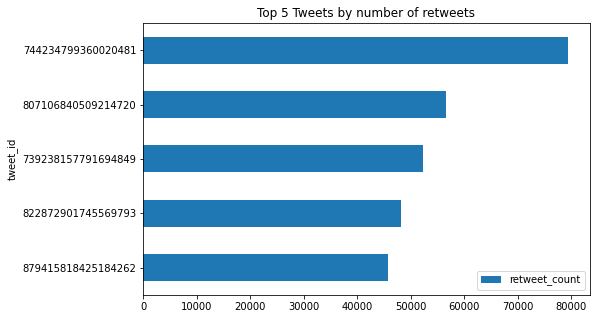

In [118]:
top_tweet.plot.barh(y = "retweet_count", figsize = (8,5), ylabel = "retweet_count", title = "Top 5 Tweets by number of retweets")

> The highest retweet_count was 79515 with tweet_id 744234799360020481

In [119]:
top_tweet.head()

retweet_count
tweet_id                         
879415818425184262          45849
822872901745569793          48265
739238157791694849          52360
807106840509214720          56625
744234799360020481          79515

#### Visualization2: Retweet_count over time

In [120]:
rt_over_time = df_tweet[["timestamp", "tweet_id", "retweet_count"]]
rt_over_time

timestamp            tweet_id  retweet_count
0     2017-07-26 15:59:51+00:00  890240255349198849           7711
1     2017-07-09 21:29:42+00:00  884162670584377345           3128
2     2017-06-18 20:30:39+00:00  876537666061221889           4800
3     2017-06-09 00:02:31+00:00  872967104147763200           5669
4     2017-06-04 23:56:03+00:00  871515927908634625           3628
...                         ...                 ...            ...
2170  2015-11-16 00:24:50+00:00  666049248165822465             41
2171  2015-11-16 00:04:52+00:00  666044226329800704            147
2172  2015-11-15 23:21:54+00:00  666033412701032449             47
2173  2015-11-15 23:05:30+00:00  666029285002620928             48
2174  2015-11-15 22:32:08+00:00  666020888022790149            532

[2175 rows x 3 columns]

In [121]:
# extract year and month
rt_over_time["year"] = pd.DatetimeIndex(rt_over_time["timestamp"]).year
rt_over_time["month"] = pd.DatetimeIndex(rt_over_time["timestamp"]).month

C:\Users\Egharevba Blessing\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Egharevba Blessing\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [122]:
rt_over_time.head()

timestamp            tweet_id  retweet_count  year  month
0  2017-07-26 15:59:51+00:00  890240255349198849           7711  2017      7
1  2017-07-09 21:29:42+00:00  884162670584377345           3128  2017      7
2  2017-06-18 20:30:39+00:00  876537666061221889           4800  2017      6
3  2017-06-09 00:02:31+00:00  872967104147763200           5669  2017      6
4  2017-06-04 23:56:03+00:00  871515927908634625           3628  2017      6

In [123]:
rt_over_time.year.value_counts()

2016    1088
2015     688
2017     399
Name: year, dtype: int64

In [124]:
rt_over_time.month.value_counts()

12    447
11    358
1     265
2     197
3     193
7     150
6     144
4     109
5     105
10     73
9      69
8      65
Name: month, dtype: int64

year
2015     757069
2016    2999171
2017    2242382
Name: retweet_count, dtype: int64

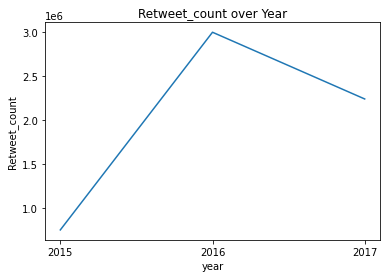

In [125]:
# retweet_count over year
plott = rt_over_time.groupby("year")["retweet_count"].sum()
plott.plot()
plt.xticks([2015, 2016, 2017])
plt.ylabel("Retweet_count")
plt.title("Retweet_count over Year")
plott

month
1     735314
2     482131
3     497091
4     344090
5     457453
6     688633
7     633536
8     236496
9     249528
10    333843
11    423151
12    917356
Name: retweet_count, dtype: int64

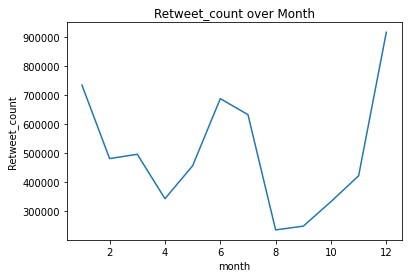

In [126]:
# retweet_count over month
plott = rt_over_time.groupby("month")["retweet_count"].sum()
plott.plot()
plt.ylabel("Retweet_count")
plt.title("Retweet_count over Month")
plott

#### Visualization 3: Display Dog with the highest no of retweet

Labrador_retriever with  79515  no of retweets


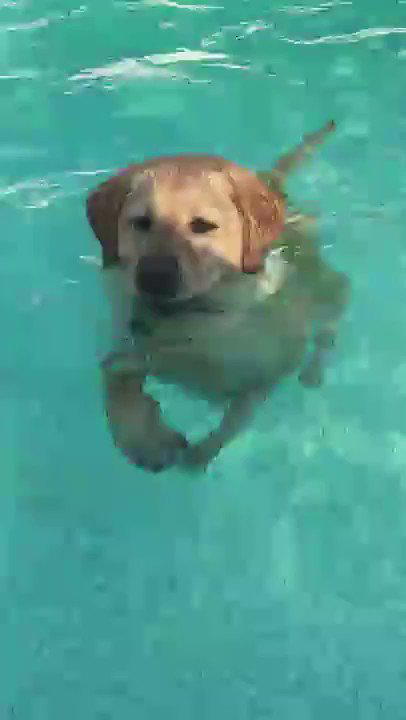

In [127]:
# get the dataframe of the dog with the highest no of retweet
highest_retweeted_dog = df_tweet[df_tweet.retweet_count == df_tweet.retweet_count.max()]

hrd_url = highest_retweeted_dog.iloc[0]["jpg_url"]
response = requests.get(hrd_url)
img = Image.open(BytesIO(response.content))


hrd_breed = highest_retweeted_dog.iloc[0]["p1"]
hrd_retweet = highest_retweeted_dog.iloc[0]["retweet_count"]


print(hrd_breed, "with ", hrd_retweet, " no of retweets")

img

> Labrador_retriever breed had the highest no of retweets of 79515 

#### Display Dog with the Highest no of favourite_count

Lakeland_terrier with  48265  no of fav_counts


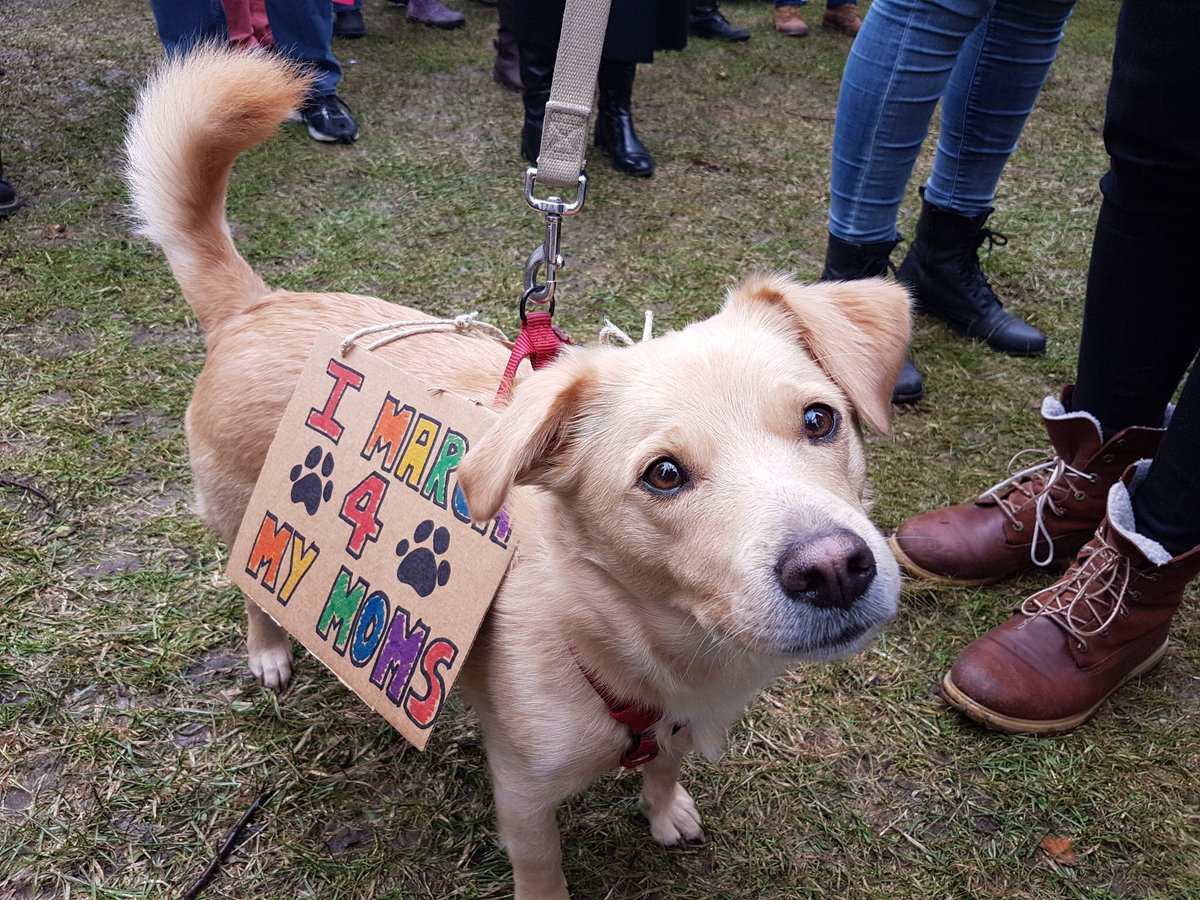

In [128]:
# get the dog with the highest no of faavourite count
highest_fav_dog = df_tweet[df_tweet.favorite_count == df_tweet.favorite_count.max()]

hfd_url = highest_fav_dog.iloc[0]["jpg_url"]
response = requests.get(hfd_url)
img = Image.open(BytesIO(response.content))


hfd_breed = highest_fav_dog.iloc[0]["p1"]
hfd_retweet = highest_fav_dog.iloc[0]["retweet_count"]



print(hfd_breed, "with ", hfd_retweet, " no of fav_counts")

img

>Lakeland_terrier had the highest no of favorite_Count of 48265  